In [1]:
import pandas as pd
import warnings
import numpy as np
from scipy.stats import norm
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Earthquakes_database.csv')
data.head()

Mounted at /content/drive


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
data['Date'].head()

0    1/2/1965
1    1/4/1965
2    1/5/1965
3    1/8/1965
4    1/9/1965
Name: Date, dtype: object

In [4]:
a = data[data.Date == "2011-03-13T02:23:34.520Z"].index
data.drop(a, inplace =True)
b  = data[data.Date == "1985-04-28T02:53:41.530Z"].index
data.drop(b, inplace =True)
c  = data[data.Date == "1975-02-23T02:58:41.000Z"].index
data.drop(c, inplace =True)

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')


data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year



In [8]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,month,year
0,1965-01-02,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
1,1965-01-04,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
2,1965-01-05,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
3,1965-01-08,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
4,1965-01-09,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,12,2016
23408,2016-12-28,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,12,2016
23409,2016-12-28,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,12,2016
23410,2016-12-29,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,12,2016


In [9]:
column_order = ['Date', 'year', 'month'] + [col for col in data.columns if col not in ['Date', 'year', 'month']]
data = data[column_order]

In [10]:
data

,Date,year,month,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,1965,1,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,1965,1,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,1965,1,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,1965,1,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,1965,1,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,2016,12,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,2016-12-28,2016,12,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,2016-12-28,2016,12,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,2016-12-29,2016,12,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [11]:
data['magnitude_classes'] = pd.cut(data['Magnitude'],
                                    bins=[3, 3.9, 4.9, 5.9, 6.9, 7.9, float('inf')],
                                    labels=['minor', 'light', 'moderate', 'strong', 'major', 'great'])

In [12]:
data

,Date,year,month,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,magnitude_classes
0,1965-01-02,1965,1,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,strong
1,1965-01-04,1965,1,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,moderate
2,1965-01-05,1965,1,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,strong
3,1965-01-08,1965,1,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,moderate
4,1965-01-09,1965,1,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,2016-12-28,2016,12,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,moderate
23408,2016-12-28,2016,12,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,moderate
23409,2016-12-28,2016,12,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,moderate
23410,2016-12-29,2016,12,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,strong


In [13]:
ct = pd.crosstab(index = data.Magnitude, columns = data.Type).head(20)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Magnitude,,,,
5.50,4664,0,21,0
5.51,1,0,0,0
5.52,1,0,3,0
5.53,1,0,0,0
5.54,0,0,1,0
5.55,1,0,0,0
5.58,1,0,0,0
5.60,3941,1,23,0
5.62,0,0,1,0


<Axes: xlabel='Magnitude'>

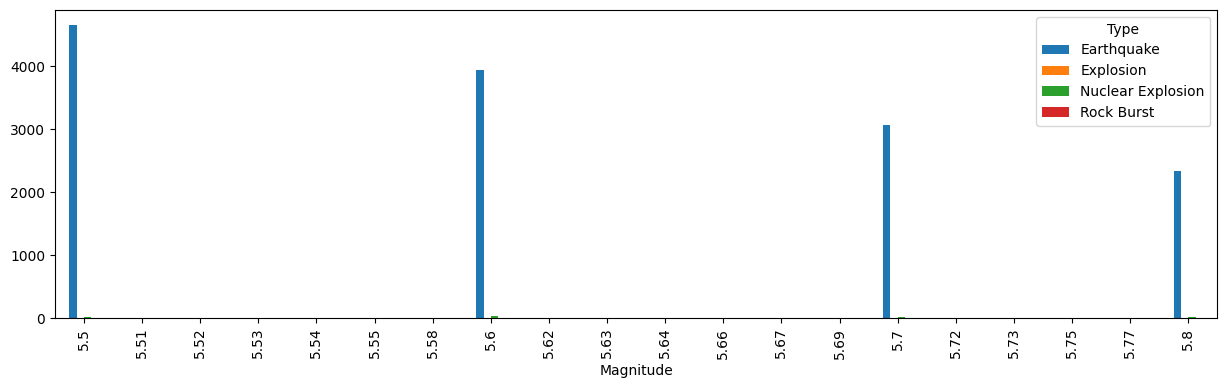

In [14]:
ct.plot(kind ='bar',figsize=(15,4))

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

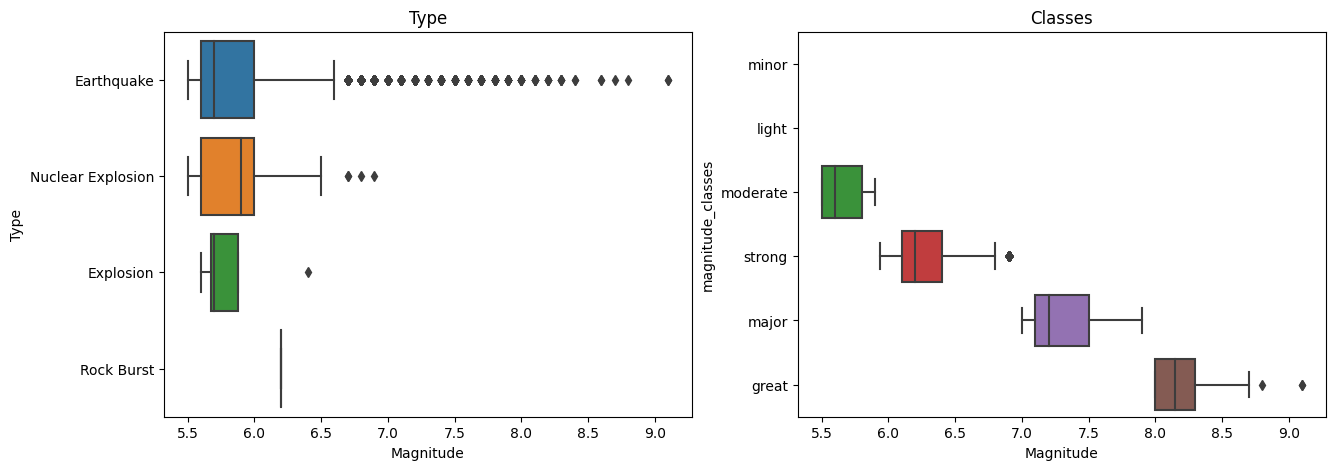

In [16]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = data.Magnitude, y = data.Type, ax = ax1).set_title('Type');
sns.boxplot(x = data.Magnitude, y = data.magnitude_classes, ax = ax2).set_title('Classes');

In [17]:
data['location'] = data.apply(lambda row: (row['Latitude'], row['Longitude']), axis=1)

In [18]:
pivot_table = data.pivot_table(values='Magnitude', index=['year', 'location'], aggfunc='mean')


pivot_table.reset_index(inplace=True)


print(pivot_table)

       year              location  Magnitude
0      1965   (-63.159, -163.707)        6.1
1      1965    (-60.468, -24.551)        6.0
2      1965    (-59.687, -26.454)        6.1
3      1965    (-59.586, -26.372)        6.1
4      1965    (-59.225, -25.091)        5.8
...     ...                   ...        ...
23398  2016   (55.2049, 164.7541)        5.5
23399  2016  (55.3979, -158.5143)        5.7
23400  2016   (57.008, -157.9321)        5.9
23401  2016  (58.4734, -156.4568)        5.6
23402  2016  (59.6363, -153.4051)        7.1

[23403 rows x 3 columns]


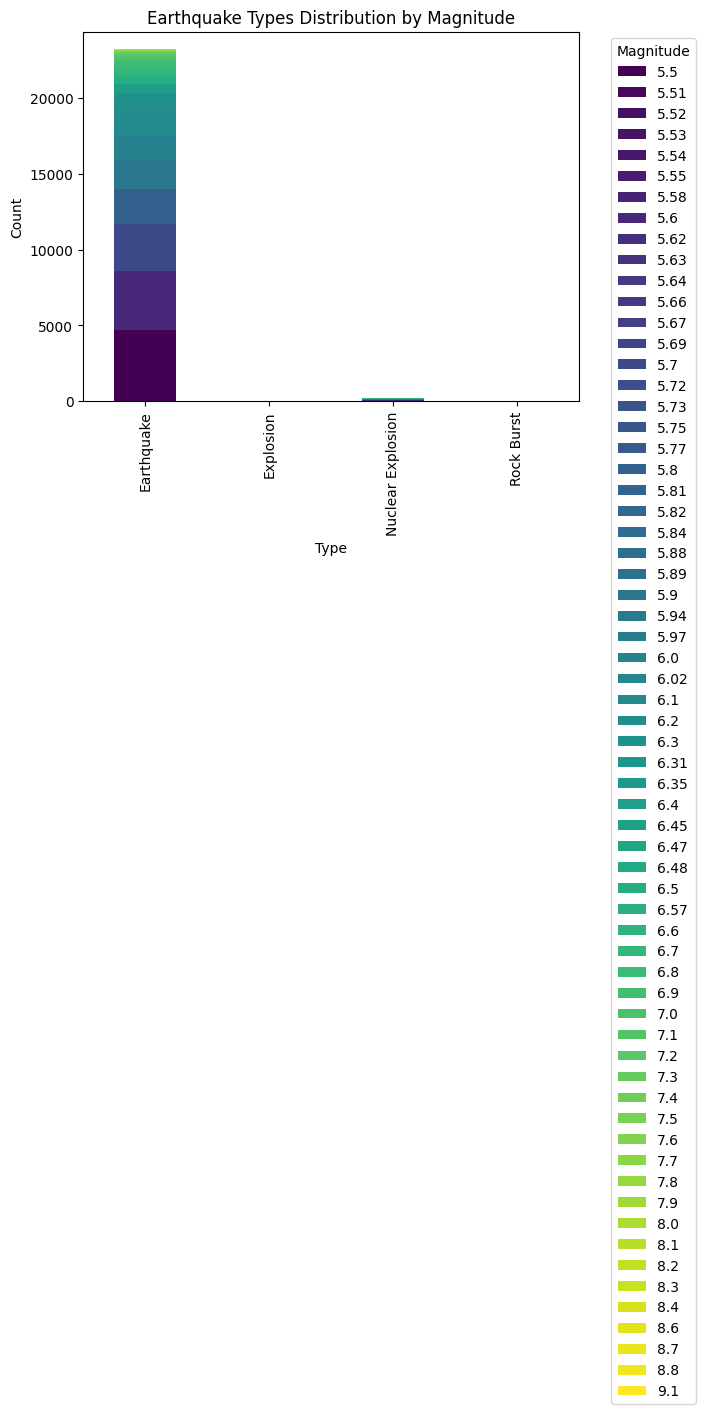

In [22]:
stacked_df = data.groupby(['Type', 'Magnitude']).size().unstack()

stacked_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Earthquake Types Distribution by Magnitude')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Magnitude', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

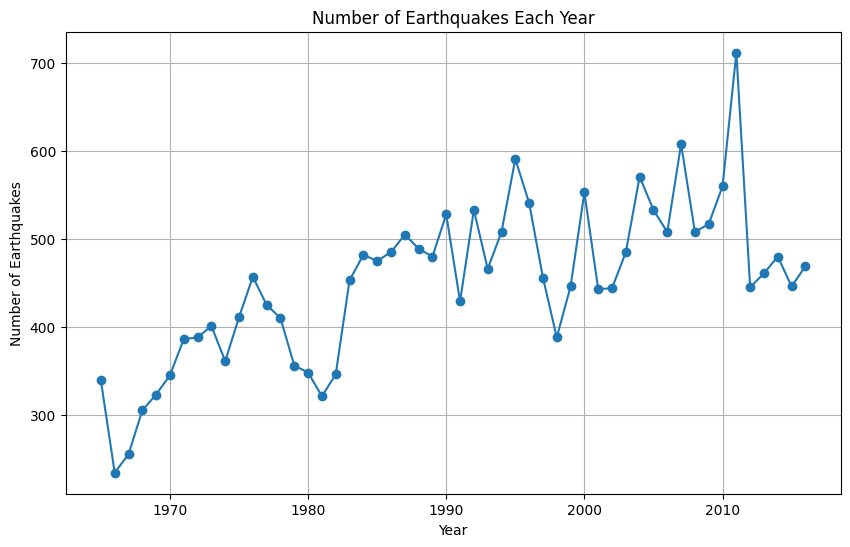

In [23]:
earthquakes_per_year = data['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o', linestyle='-')
plt.title('Number of Earthquakes Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

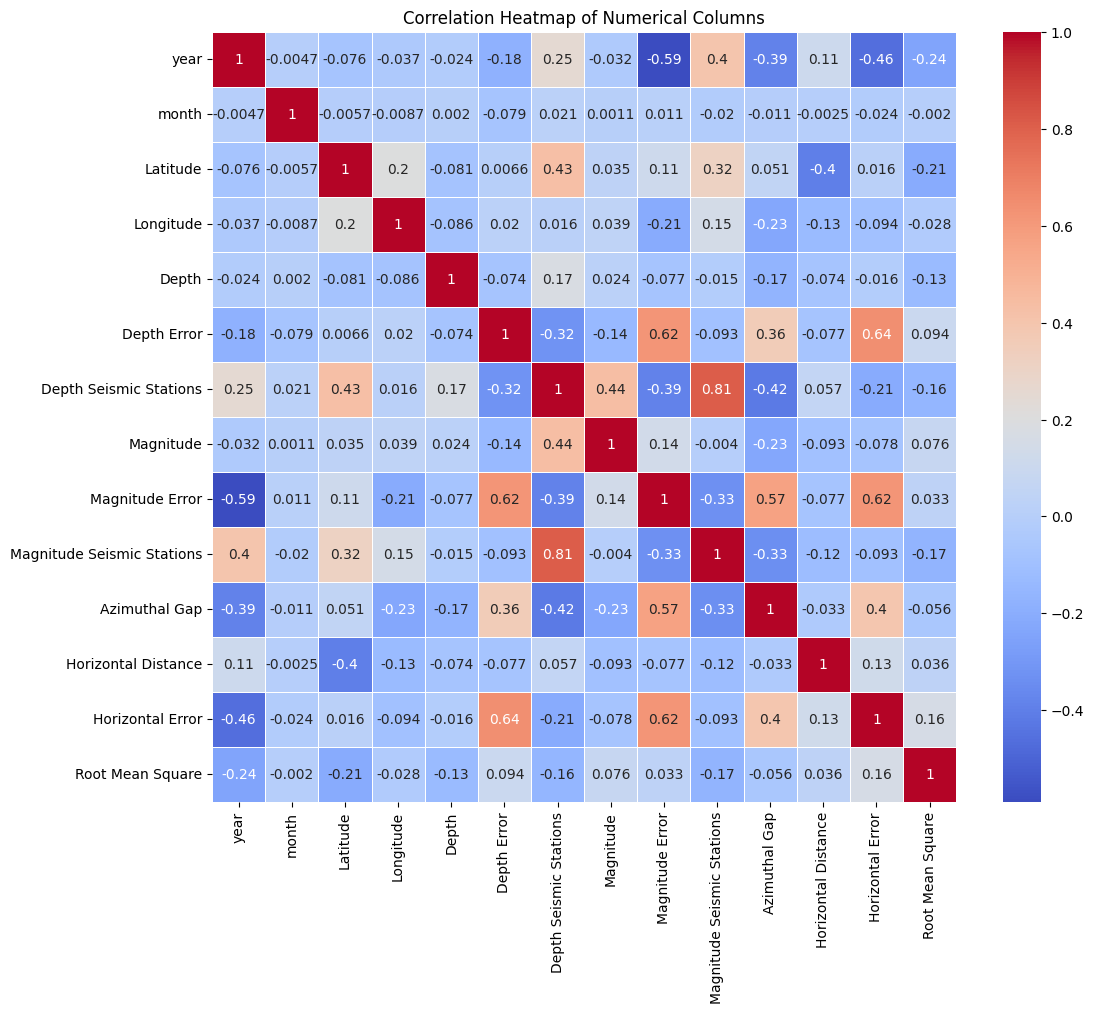

In [25]:
numerical_columns = [column for column in data.columns if data.dtypes[column] != 'object']

corr = data[numerical_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [32]:


monthly_mean_magnitude = data['Magnitude'].resample('M').mean()

monthly_mean_magnitude

Date
1965-01-31    6.123077
1965-02-28    5.955556
1965-03-31    6.057895
1965-04-30    5.945455
1965-05-31    5.954545
                ...   
2016-08-31    5.945714
2016-09-30    5.805217
2016-10-31    5.827778
2016-11-30    5.906818
2016-12-31    5.977358
Freq: M, Name: Magnitude, Length: 624, dtype: float64